# HW2
Ian Mobbs, Lina Lopez, Helena Shi, Joyce Dong Yue Huang, Kenneth Chow

## Setup
1. Import pandas as `pd` for concise use.
2. Import matplotlib for plotting
3. Read in `NYC_Restaurants.csv` and drop the `Unnamed` column, which is a duplicate of the index.

In [96]:
import pandas as pd
import matplotlib
df = pd.read_csv('NYC_Restaurants.csv', dtype='unicode').drop('Unnamed: 0', 1)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Q1
1. Create a new column called `'RESTAURANT'` and add the value of the four prior columns into it. This could also be accomplished with a map.

In [97]:
df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] +  " " + df['STREET'] +  " " + df['ZIPCODE']

## Q2
1. After combining the restaurant name and address into the `RESTAURANT` column, we can find the amount of restaurants by getting the count of unique locations in the `RESTAURANT` column

Answer: 10,114 restaurants

In [98]:
restaurants = df['RESTAURANT'].unique()
len(restaurants)

10114

## Q3
1. Create a new column `ADDRESS` that only stores that row's address
2. Create a new DataFrame called `unique_addresses` by taking the naem and address of each restaurants, then applying `drop_duplicates()` to ensure we only have one row for each address, wheras without it we'd have one row for each complaint.
3. Create mask `chains_in_unique_addresses_mask` that determines whether or not a restaurant name is non-unique among addresses (aka a chain)
4. Create series `chain_series` by removing standalone restaurants from the data and only keeping one restaurant name per chain
5. Find the length of the unique names, which is the amount of chains within the dataset.

Answer: 368 chains

In [99]:
df['ADDRESS'] = df['BUILDING'] +  " " + df['STREET'] +  " " + df['ZIPCODE']
unique_addresses = df[['DBA', 'ADDRESS', 'BORO']].drop_duplicates()
chains_in_unique_addresses_mask = unique_addresses['DBA'].duplicated()
chain_series = unique_addresses['DBA'][chains_in_unique_addresses_mask].unique()
len(chain_series)

368

## Q4
1. Get addresses of each chain location from the `unique_addresses` DataFrame by removing every row that isn't in the series of chain names
2. Find the `value_counts` of each chain
3. Plot the 20 chains with the highest value counts

Answer: Plotted

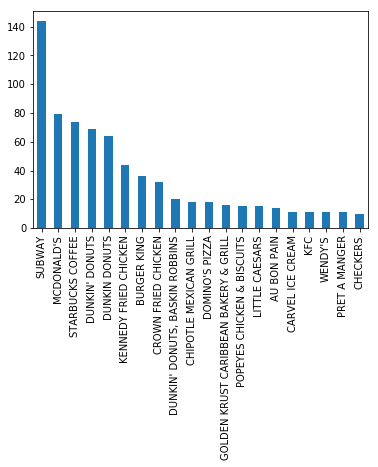

In [100]:
all_chain_addresses = unique_addresses[unique_addresses['DBA'].isin(chain_series)].sort_values('DBA')
amout_of_each_chain = all_chain_addresses['DBA'].value_counts()
amout_of_each_chain[:20].plot(kind='bar')

## Q5
1. By taking the length of series containing every chain address over the length of the series containing every unique address, we find that 16.4722% of all restaurants are chains.

Answer: 16.4722%

In [101]:
len(all_chain_addresses['DBA']) / len(unique_addresses['DBA'])

0.16472216729286138

## Q6
1. Find the occurences of each uniquely named restaurant.
2. Send the restaurants that only occur once/are not a chain to a series. Send this to a list.
3. Create a mask that locates and stores all of the information for the restaurants that are not chains.
4. Drop the duplicates. In this case, there are duplicates because in the original dataframe, each row is a unique violation. 
5. Create another data frame with a NON_CHAIN column that holds the counts of the number of non-chain restaurants in each borough.
6. Remove the "Missing" borrow.
7. Create the bar graph/plot based on the NON_CHAIN column.

Answer: Plotted

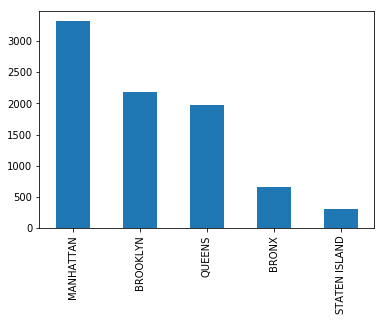

In [102]:
restaurant_count = unique_addresses['DBA'].value_counts()
non_chains = restaurant_count.loc[restaurant_count == 1]

non_chains_list = non_chains.index.tolist()

non_chain_df_mask = df.loc[df['DBA'].isin(non_chains_list)]
non_chain_df = non_chain_df_mask[['DBA','BORO']].drop_duplicates()

boro_df = pd.DataFrame()
boro_df['NON_CHAIN'] = non_chain_df['BORO'].value_counts()
boro_df['NON_CHAIN'] = boro_df['NON_CHAIN']

boro_df = boro_df.drop(['Missing'])
boro_df['NON_CHAIN'].plot(kind = 'bar')

## Q7
1. Create a column called 'REST_COUNT' in the boro_df DataFrame. Fill this with the count of total restaurants in each boro. 
2. Drop the 'Missing' borough.
3. Create another column called 'PERC_NONCHAIN_RESTAURANTS' in the boro_df DataFrame. Fill this with the percentage of non chain restaurants in each borough. This is computed by dividing the previous column (NON_CHAIN) from Q6 by the total number of restaurants in that borough (REST_COUNT).
4. Plot that computed column.

Answer: Plotted

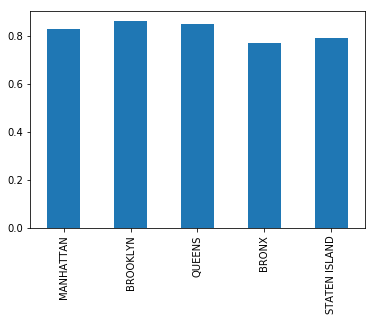

In [103]:
boro_df['REST_COUNT'] = unique_addresses['BORO'].value_counts().drop('Missing')

boro_df['PERC_NONCHAIN_RESTAURANTS'] = boro_df['NON_CHAIN']/boro_df['REST_COUNT']
boro_df['PERC_NONCHAIN_RESTAURANTS'].plot(kind = 'bar')

## Q8

Answer: Shown below

In [104]:
df['RESTAURANT CUISINES'] = df['DBA'] + " " + df['CUISINE DESCRIPTION']
unique_restaurants = df[['DBA', 'CUISINE DESCRIPTION']].drop_duplicates()
cuisines = unique_restaurants['CUISINE DESCRIPTION'].value_counts()
cuisines[:20]

American                                                            2112
Chinese                                                             1029
Italian                                                              445
Pizza                                                                410
Café/Coffee/Tea                                                      390
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     383
Japanese                                                             331
Mexican                                                              321
Spanish                                                              311
Bakery                                                               304
Caribbean                                                            258
Pizza/Italian                                                        209
Delicatessen                                                         153
Asian                                              

## Q9
1. Create a mask that places null values in VIOLATION CODE as True
2. Create a new dataframe and apply the mmask to the dataframe
3. Order by frequency into top 20 and list by CUISINE DESCRIPTION
4. Plot Top 20

Answer: Plotted

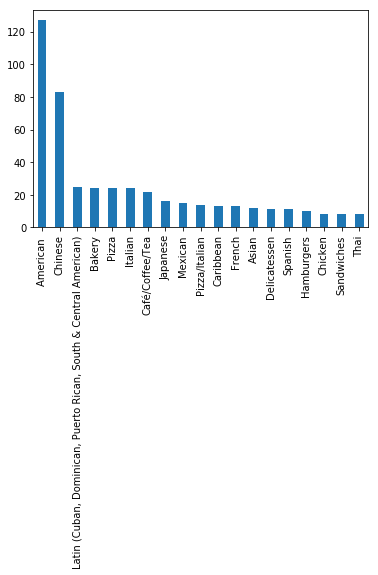

In [105]:
#Put a mask that calls at null values in VIOLATION CODE True
no_viol_mask = df["VIOLATION CODE"].isnull()
#apply mask to the dataframe, which shows those two columns
df_noviolations = df[["RESTAURANT", "CUISINE DESCRIPTION"]][no_viol_mask]
#order by frequency
top_20 = df_noviolations["CUISINE DESCRIPTION"].value_counts()[0:19]
top_20.plot(kind = "bar")

## Q10

1. Get the specific restaurants by location by creating a new column with unique address, cuisine description, and inspection dates. This ensures that you have unique names for a restaurant on the day of inspection, but does include duplicates because of multiple complaints per day that resulted in one inspection.
2. Drop duplicates of multiple violations on one inspection date, because you don't want to count the same inspection twice
3. Create a series for the total amount of inspections using value_counts() by Cuisine Description. 
4. Create a mask that gets only the inspections greater than 20
5. Apply the mask to the Cuisines series (3)
6. Get the ratio of no violations over total number of inspections by dividing
7. Print the top 10 ratios in descending order with .sort_values

Answer: Shown below

In [106]:
mask_no_violation = df['VIOLATION CODE'].isnull()
df_no_violation = df[['RESTAURANT','CUISINE DESCRIPTION']][mask_no_violation]
s_cuisine_occurences = df_no_violation['CUISINE DESCRIPTION'].value_counts()

df['RESTAURANT CUISINES'] = df['RESTAURANT'] + " " + df['CUISINE DESCRIPTION']
unique_restaurants = df[['RESTAURANT', 'CUISINE DESCRIPTION']].drop_duplicates()
cuisines_rest_count = unique_restaurants['CUISINE DESCRIPTION'].value_counts()
#create a mask of the inspections greater than 20
mask = cuisines_rest_count >= 20
#apply mask
cuisines_rest_count[mask]
#get the ratio of no violations over total number of inspections 
series_ratios = s_cuisine_occurences/cuisines_rest_count[mask]
#print the top 10 ratios in descending order
series_ratios.sort_values(ascending=False)[:10]

Bangladeshi                      0.150000
Peruvian                         0.142857
Barbecue                         0.142857
Russian                          0.111111
Soups & Sandwiches               0.095238
Continental                      0.095238
Vietnamese/Cambodian/Malaysia    0.093750
Soul Food                        0.090909
French                           0.089041
Tex-Mex                          0.086207
Name: CUISINE DESCRIPTION, dtype: float64

## Q11
1. Create a crosstab to get a frequency table for boroughs and violations. 
2. Create arrays for borough names, the max number of violations for that borough, and the description of the violation that showed up the most in that borough
3. Create a series with the violation description and the max number for that violation
4. Create a data frame with the series created in number 3 with borough names array as the index 

Answer: Shown below

In [107]:
temp3 = pd.crosstab(df['BORO'], df['VIOLATION DESCRIPTION'])
boro_index = df['BORO'].unique()
boro_values = []
boro_violations = []
brooklyn = temp3.ix['BROOKLYN'].max()
brooklyn_violation = temp3.ix['BROOKLYN'].idxmax()
boro_values.append(brooklyn)
boro_violations.append(brooklyn_violation)
queens = temp3.ix['QUEENS'].max()
queens_violation = temp3.ix['QUEENS'].idxmax()
boro_values.append(queens)
boro_violations.append(queens_violation)
manhattan = temp3.ix['MANHATTAN'].max()
manhattan_violation = temp3.ix['MANHATTAN'].idxmax()
boro_values.append(manhattan)
boro_violations.append(manhattan_violation)
bronx = temp3.ix['BRONX'].max()
bronx_violation = temp3.ix['BRONX'].idxmax()
boro_values.append(bronx)
boro_violations.append(bronx_violation)
staten_island = temp3.ix['STATEN ISLAND'].max()
staten_island_violation = temp3.ix['STATEN ISLAND'].idxmax()
boro_values.append(staten_island)
boro_violations.append(staten_island_violation)
missing = temp3.ix['Missing'].max()
missing_violation = temp3.ix['Missing'].idxmax()
boro_values.append(missing)
boro_violations.append(missing_violation)


data = {'Most Common Violation': boro_violations, 'Number of Violations': boro_values}
new = pd.DataFrame(data, index=boro_index)
new

,Most Common Violation,Number of Violations
BROOKLYN,Non-food contact surface improperly constructe...,1485
QUEENS,Non-food contact surface improperly constructe...,1416
MANHATTAN,Non-food contact surface improperly constructe...,2417
BRONX,Non-food contact surface improperly constructe...,500
STATEN ISLAND,Non-food contact surface improperly constructe...,230
Missing,Non-food contact surface improperly constructe...,8


## Q12
1. Get the boros and violation counts for the boro by using crosstab to add frequencies of the dummy variables and putting them into a dataframe
2. Get the unique names of the boros and put them into an array, for later use
3. Create an empty list to contain the violation names
4. Get the total violations frequencies table by making a series of the value_counts()
5. Set a counter and create a while loop that goes through the elements of the first dataframe
6. While looping, create series1 for each borough, containing violations and their value counts
7. Get the ratio of violations in a boro/total violations of that type, sort into most frequent in that boro, and append to the violation names series (step 3)
8. Create a series from the two lists of unique boro names (2) and boro violations (3) that you appended to
9. Print the series

Answer: Shown below

In [108]:
#Gets the boro and all the violation counts for that boro
df_boro_violations = pd.crosstab(df['BORO'], df['VIOLATION DESCRIPTION'])
#get all the names of the boros and puts them into an array
boro_index = df['BORO'].unique()
#create a list to contain the violations
boro_violations = []
#get all the frequencies and their total number of occurences
series_violation_frequencies_total = df['VIOLATION DESCRIPTION'].value_counts()
#Iterate through boro violations
for count in range(len(df_boro_violations)):
    #gets the current series
    series1 = df_boro_violations.ix[count]
    #gets the highest ratio and appends to list
    boro_violations.append((series1/series_violation_frequencies_total).sort_values(ascending=False).index[0])
#creates a series of the boro names and the highest ratio violation
boro_most_frequent_violations = pd.Series(boro_violations, index=boro_index)
#print the series
print(boro_most_frequent_violations)

BROOKLYN                               Unprotected food re-served.
QUEENS           Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
BRONX            ''''Wash hands sign not posted at hand wash f...
STATEN ISLAND    Harmful, noxious gas or vapor detected. CO ~1 ...
Missing          Eggs found dirty/cracked; liquid, frozen or po...
dtype: object
